In [1]:
from PIL import Image
from pathlib import Path
import imagesize
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
plt.style.use('fivethirtyeight')

## Class distribution

In [2]:
path = 'gi/'
classes = ['esophagitis', 'polyp', 'ulcerative-colitis']
counts = []

for i in classes:
    temp = len(os.listdir(f'{path}{i}'))
    counts.append(temp)

classes, counts

(['esophagitis', 'polyp', 'ulcerative-colitis'], [1663, 2028, 1851])

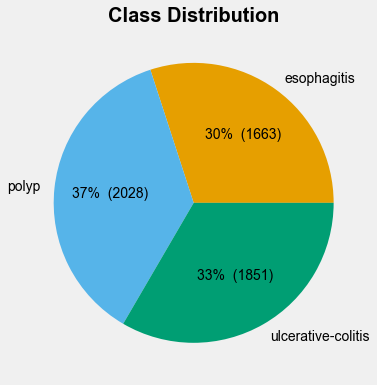

In [3]:
title = {'fontname':'Arial', 'size':20, 'weight':'bold'}
label = {'fontname':'Arial', 'size':14, 'color': 'black'}
tick = {'fontname':'Arial', 'size':13, 'color': 'black'}

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(6,6))
plt.title("Class Distribution", **title)
plt.pie(counts, labels=classes, colors=("#E69F00", "#56B4E9", "#009E73"), autopct=make_autopct(counts), textprops=label)
plt.show()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

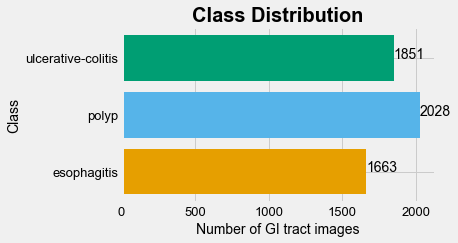

In [4]:
title = {'fontname':'Arial', 'size':20, 'weight':'bold'}
label = {'fontname':'Arial', 'size':14, 'color': 'black'}
tick = {'fontname':'Arial', 'size':13, 'color': 'black'}

plt.figure(figsize=(5,3))
plt.barh(classes, counts, color=("#E69F00", "#56B4E9", "#009E73"))
for index, value in enumerate(counts):
    plt.text(value, index, str(value), **label)

plt.title("Class Distribution", **title)
plt.xlabel("Number of GI tract images", **label)
plt.ylabel("Class", **label)
plt.xticks(**tick)
plt.yticks(**tick)

## Image size

### Polyp

In [5]:
path = 'gi/polyp'

# Get the Image Resolutions
imgs = [img.name for img in Path(f'{path}').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(f'{path}/{f}')

# Convert it to Dataframe and compute aspect ratio
df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
df[["Width", "Height"]] = pd.DataFrame(df["Size"].tolist(), index=df.index)
df["Aspect Ratio"] = round(df["Width"] / df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(df)}')
df.head()

Total Nr of Images in the dataset: 2028


,FileName,Size,Width,Height,Aspect Ratio
0,1.jpg,"(1350, 1064)",1350,1064,1.27
1,10.jpg,"(720, 576)",720,576,1.25
2,100.jpg,"(720, 576)",720,576,1.25
3,1000.jpg,"(1920, 1072)",1920,1072,1.79
4,1001.jpg,"(619, 529)",619,529,1.17


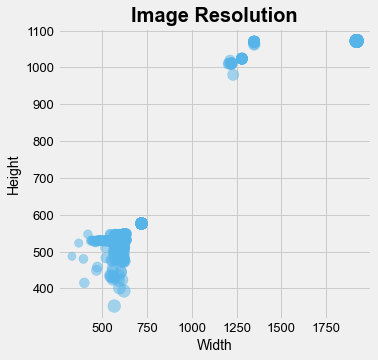

In [6]:
title = {'fontname':'Arial', 'size':20, 'weight':'bold'}
label = {'fontname':'Arial', 'size':14, 'color': 'black'}
tick = {'fontname':'Arial', 'size':13, 'color': 'black'}

plt.figure(figsize=(5,5))
plt.title("Image Resolution", **title)
plt.xlabel("Width", **label)
plt.ylabel("Height", **label)
plt.xticks(**tick)
plt.yticks(**tick)
plt.scatter(df['Width'], df['Height'], c='#56B4E9', alpha=0.5, s=df["Aspect Ratio"]*100, picker=True)

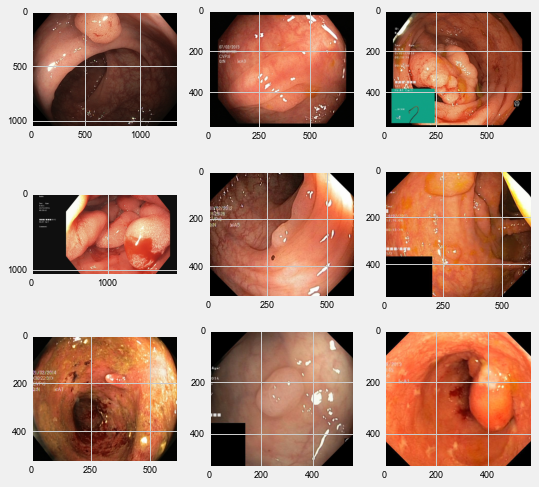

In [7]:
tick = {'fontname':'Arial', 'size':9, 'color': 'black'}

img = glob.glob('gi/polyp/*.jpg')
plt.figure(figsize=(8, 8))
for i in range(9):
    temp = plt.imread(img[i])
    plt.subplot(3,3,i+1)
    plt.imshow(temp)
    plt.xticks(**tick)
    plt.yticks(**tick)

### Esophagitis

In [8]:
path = 'gi/esophagitis'

# Get the Image Resolutions
imgs = [img.name for img in Path(f'{path}').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(f'{path}/{f}')

# Convert it to Dataframe and compute aspect ratio
df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
df[["Width", "Height"]] = pd.DataFrame(df["Size"].tolist(), index=df.index)
df["Aspect Ratio"] = round(df["Width"] / df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(df)}')
df.head()

Total Nr of Images in the dataset: 1663


,FileName,Size,Width,Height,Aspect Ratio
0,1.jpg,"(1280, 1024)",1280,1024,1.25
1,10.jpg,"(1280, 1024)",1280,1024,1.25
2,100.jpg,"(1280, 1024)",1280,1024,1.25
3,1000.jpg,"(1280, 1024)",1280,1024,1.25
4,1001.jpg,"(1221, 1013)",1221,1013,1.21


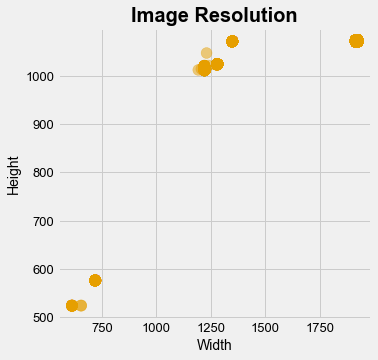

In [9]:
title = {'fontname':'Arial', 'size':20, 'weight':'bold'}
label = {'fontname':'Arial', 'size':14, 'color': 'black'}
tick = {'fontname':'Arial', 'size':13, 'color': 'black'}

plt.figure(figsize=(5,5))
plt.title("Image Resolution", **title)
plt.xlabel("Width", **label)
plt.ylabel("Height", **label)
plt.xticks(**tick)
plt.yticks(**tick)
plt.scatter(df['Width'], df['Height'], c='#E69F00', alpha=0.5, s=df["Aspect Ratio"]*100, picker=True)

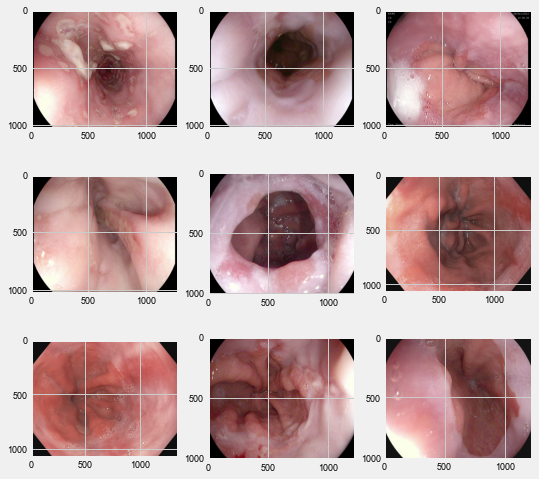

In [10]:
tick = {'fontname':'Arial', 'size':9, 'color': 'black'}

img = glob.glob('gi/esophagitis/*.jpg')
plt.figure(figsize=(8, 8))
for i in range(9):
    temp = plt.imread(img[i])
    plt.subplot(3,3,i+1)
    plt.imshow(temp)
    plt.xticks(**tick)
    plt.yticks(**tick)

### Ulcerative colitis

In [11]:
path = 'gi/ulcerative-colitis'

# Get the Image Resolutions
imgs = [img.name for img in Path(f'{path}').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(f'{path}/{f}')

# Convert it to Dataframe and compute aspect ratio
df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
df[["Width", "Height"]] = pd.DataFrame(df["Size"].tolist(), index=df.index)
df["Aspect Ratio"] = round(df["Width"] / df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(df)}')
df.head()

Total Nr of Images in the dataset: 1851


,FileName,Size,Width,Height,Aspect Ratio
0,1.jpg,"(720, 576)",720,576,1.25
1,10.jpg,"(720, 576)",720,576,1.25
2,100.jpg,"(720, 576)",720,576,1.25
3,1000.jpg,"(720, 576)",720,576,1.25
4,1001.jpg,"(623, 529)",623,529,1.18


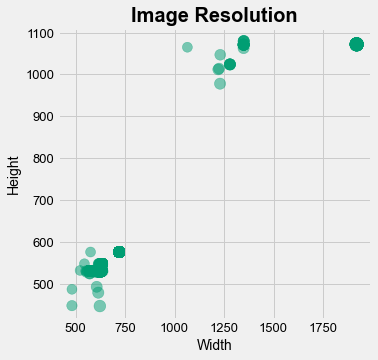

In [12]:
title = {'fontname':'Arial', 'size':20, 'weight':'bold'}
label = {'fontname':'Arial', 'size':14, 'color': 'black'}
tick = {'fontname':'Arial', 'size':13, 'color': 'black'}

plt.figure(figsize=(5,5))
plt.title("Image Resolution", **title)
plt.xlabel("Width", **label)
plt.ylabel("Height", **label)
plt.xticks(**tick)
plt.yticks(**tick)
plt.scatter(df['Width'], df['Height'], c='#009E73', alpha=0.5, s=df["Aspect Ratio"]*100, picker=True)

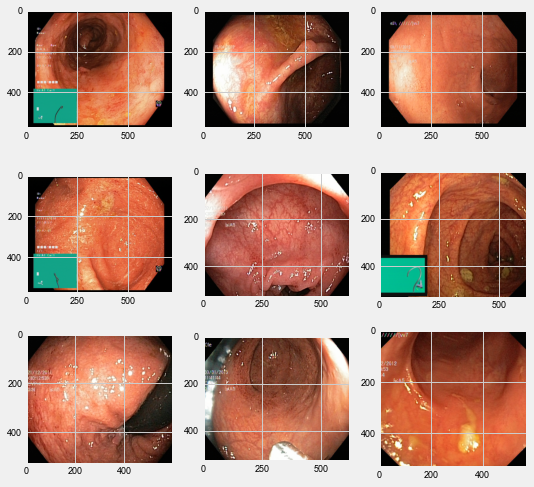

In [13]:
tick = {'fontname':'Arial', 'size':9, 'color': 'black'}

img = glob.glob('gi/ulcerative-colitis/*.jpg')
plt.figure(figsize=(8, 8))
for i in range(9):
    temp = plt.imread(img[i])
    plt.subplot(3,3,i+1)
    plt.imshow(temp)
    plt.xticks(**tick)
    plt.yticks(**tick)

## Using thresholds with brightness normalization

In [14]:
# pull out materils that stand out from the background more reliably
title = {'fontname':'Arial', 'size':9, 'weight':'bold'}
label = {'fontname':'Arial', 'size':8, 'color': 'black'}
tick = {'fontname':'Arial', 'size':9, 'color': 'black'}

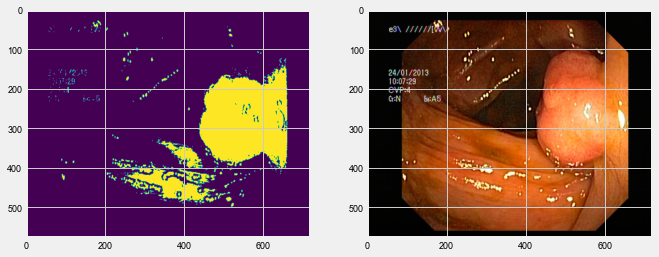

In [15]:
polyp = plt.imread('gi/polyp/500.jpg')

plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(polyp[:,:,0] > 220)
plt.xticks(**tick)
plt.yticks(**tick)

# original image
plt.subplot(122)
plt.imshow(polyp)
plt.xticks(**tick)
plt.yticks(**tick)
plt.show()

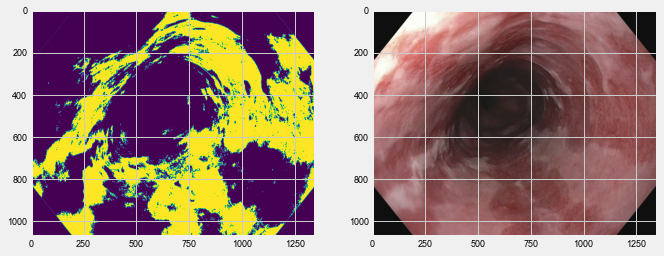

In [16]:
esophagitis = plt.imread('gi/esophagitis/1648.jpg')

plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow((esophagitis[:,:,1] > 50) & (esophagitis[:,:,1] < 90))
plt.xticks(**tick)
plt.yticks(**tick)

# original image
plt.subplot(122)
plt.imshow(esophagitis)
plt.xticks(**tick)
plt.yticks(**tick)
plt.show()

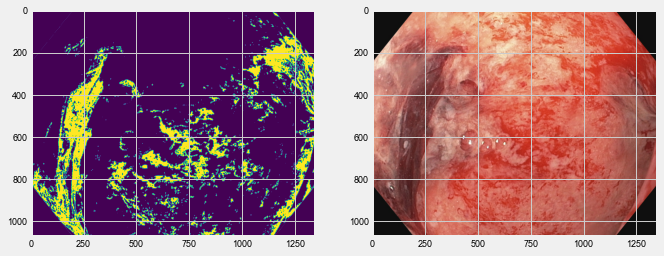

In [17]:
ulcer = plt.imread('gi/ulcerative-colitis/1805.jpg')

plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow((ulcer[:,:,1] < 70) & (ulcer[:,:,1] > 40))
plt.xticks(**tick)
plt.yticks(**tick)

# original image
plt.subplot(122)
plt.imshow(ulcer)
plt.xticks(**tick)
plt.yticks(**tick)
plt.show()